# Homework 8: Magnetization, Energy in the Ising Model

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Friday, June 16    

*Joshua Salazar*

# Problem 0

Please be sure to fill out:
1. The course survey (e-mailed directly to you; e-mail Prof. Tanedo if you have not received this!)
2. iEval course evaluation (http://ieval.ucr.edu)
3. Sign up for a "final interview": https://doodle.com/poll/xyb7dgcupq9gwaqm

# Problem 1

Code the Ising model to study the phase transition at $T_c\approx 2.27$ (in units where $J = k_B = 1$). Use the Metropolis algorithm for Markov Chain Monte Carlo, as we set up in Lecture 18: https://github.com/Physics177-2017/Lec18-Ising-Model/blob/master/Lec18-IsingModel.ipynb

**Make the following plots:**
1. Magnetization as a function of temperature
2. Energy as a function of temperature

You may define magnetization as the total spin of the system (sum of the spins of each node). You may define the energy as the sum of $\Delta E_i$ for each spin $i$. Recall that 

$$\Delta E_i = -\sum_{j} s_is_j$$

(Note: actually, you should define $E = \sum_i \Delta E_i/4$, but we don't care about the overall pre-factors, we just want to see the qualitative shapes of the plots.)

**Guidelines**
You should be able to get reasonable results for:
* A $20\times 20$ array.
* Sampling 1000 temperature points between $T=1$ and $T=4$
* Allowing 2000 Monte Carlo steps to draw a sample.

*Pro-tip:* One way to improve your calculations is to let your Monte Carlo "equilibrate" before recording data. In other words, your Markov Chain algorithm should be:

1. Pick a random configuration
2. Run for 2000 steps (without recording data)
3. Perform your Markov Chain algorithm as usual, using the configuration at the end of step 2 as your initial configuration.


Code this up on your own, you may use the code from Lecture 18 as a starting point. 

The *answers* are available in a notebook written by Rajesh Singh:
http://rajeshrinet.github.io/blog/2014/ising-model/
... you may use that notebook (in particular, the plots) as a guideline for what your code should produce. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import * # clunky, but allows random() and randint(a,b)

N = 3
N_trials = 100

In [2]:
# Initialize the grid
def grid_initialize(array_length):
    some_grid = np.zeros((array_length, array_length))

    for i in range(array_length):
        for j in range(array_length):
            # assign a random +1 or -1 sping
            some_grid[i][j] = 2*randint(0,1) - 1 
    return some_grid

grid = grid_initialize(N)

In [3]:
# DEFINE QUIET VERSION
def new_spin(some_grid, beta, i, j):
    """
    Takes the grid and the temperature,
    runs Metropolis algorithm to give the
    updated value of the (i,j) element.
    """
    spin = some_grid[i,j]
    spin_flip = -spin

# ##  TESTING
#     print(i)
#     print(j)
#     print("spin is:") 
#     print(some_grid[i,j])

    
#   Periodic boundary conditions
    net_neighbor_spin = some_grid[(i+1)%N,j] + some_grid[(i-1)%N,j] + some_grid[i,(j+1)%N] + some_grid[i,(j-1)%N]
        
    deltaE = -spin_flip*net_neighbor_spin - (-spin*net_neighbor_spin)
# ##  TESTING
#     print("deltaE is")
#     print(deltaE)
        
    if deltaE < 0:
#         print("lower E, flipped")
        return -spin
    
    else:
        if random() < np.exp(-beta*deltaE):
#             print("lucky roll, flipped")
            return -spin
        else:
#             print("no flip")
            return spin

In [4]:
def grid_update(some_grid, arraylength, beta):
    i = randint(0,arraylength-1)
    j = randint(0,arraylength-1)
#     new_grid = some_grid
#     new_grid[i,j] = new_spin(some_grid, beta, i, j)
#     return new_grid
    some_grid[i,j] = new_spin(some_grid, beta, i, j)

#print(grid)
#grid_update(grid,1)
#print(grid)

In [5]:
def MCMKC_record(some_grid, num_trials, arraylength, beta ):
    """Generates a list of configurations (grids) for the the Monte Carlo MK chain Metropolis algorithm."""
    some_record = []
    for a in range(num_trials):
        some_record.append(np.array(some_grid))
        # Note: the np.array(...) is important,
        #  this assigns a value rather than a reference.
        #  If you just did record.append(grid), you 
        #  append a reference to the current value of "grid"
        #  ... this gets updated, and so every element of record gets updated
        grid_update(some_grid, arraylength, beta)
    
    return some_record
    
#for a in range(3):
    #plt.imshow(record[a])
    #plt.show()

In [6]:
# The following definitions are based of code from Rajesh Singh link
def calcEnergy(some_grid):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(some_grid)):
        for j in range(len(some_grid)):
            S = some_grid[i,j]
            nb = some_grid[(i+1)%N, j] + some_grid[i,(j+1)%N] + some_grid[(i-1)%N, j] + some_grid[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

def calcMag(some_grid):
    '''Magnetization of a given configuration'''
    mag = np.sum(some_grid)
    return mag

In [7]:
# The following code is based on code from Rajesh Singh link
def MCMKC_energy_mag(num_trials, arraylength, equilibrium_steps, beta):
    """given the list generated by the MCMKC_record function for a specific beta, this function
    generates a list of average energies and magnitizations for MCMKC_record ensembles corresponding to a list of beta values"""
    
    Energy = np.zeros(len(beta))
    Mag = np.zeros(len(beta))
    
    for m in range(len(beta)):
        energy = 0.0
        mag = 0.0
        grid_record = []
        some_grid = grid_initialize(arraylength)

        for i in range(equilibrium_steps):
            grid_update(some_grid, arraylength, beta[m])
        
        grid_record = MCMKC_record(some_grid, num_trials, arraylength, beta[m])
        
        for a in range(len(grid_record)):
            energy = energy + calcEnergy(grid_record[a])
            mag = mag + calcMag(grid_record[a])
        
        Energy[m] = energy / (len(grid_record)*(arraylength*arraylength)) 
        Mag[m] = mag / (len(grid_record)*(arraylength*arraylength))
        
    return Energy, Mag        

In [8]:
seed(10)
N = 20
N_trials = 2000
equilibrium_steps = 2000
temperature = np.linspace(1,4,1000)
beta = 1.0 / temperature

E, M = MCMKC_energy_mag(N_trials, N, equilibrium_steps, beta)

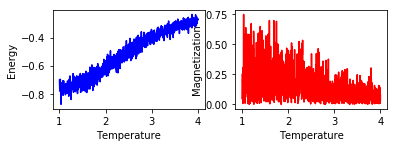

In [9]:
f = plt.figure()

sp = f.add_subplot(2,2,1)
plt.plot(temperature, E, color = 'b', label = 'Energy')
plt.xlabel('Temperature')
plt.ylabel('Energy')

sp = f.add_subplot(2,2,2)
plt.plot(temperature, abs(M), color = 'r', label = 'Magnetization')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')

plt.show()